In [775]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene
import seaborn as sns
from scipy.stats import mannwhitneyu

In [777]:
# 1
print(f"H0: Sales prices did not at least triple from 2000 to 2009.")

H0: Sales prices did not at least triple from 2000 to 2009.


In [779]:
# 2-3 The questions asked were not asked in the optimal logical order.
df = pd.read_csv("Assessor_Parcel_Sales.csv")

In [780]:
print(df.head())

            pin  year  township_code  neighborhood_code class  \
0  3.101210e+13  2000             32              32050   278   
1  1.429100e+13  2000             73              73150   299   
2  1.316410e+13  2000             71              71101   203   
3  2.423300e+13  2014             39              39250   100   
4  1.935400e+13  2016             72              72200   205   

          sale_date  is_mydec_date  sale_price  sale_document_num  \
0     April 01 2000          False      177500             317676   
1  February 01 2000          False      315000             326770   
2      June 01 2000          False      192000             519440   
3      June 01 2014          False         500         1427529079   
4    August 01 2016          False           1         1625129009   

  sale_deed_type mydec_deed_type sale_seller_name  is_multisale  \
0        Trustee             NaN              NaN         False   
1       Warranty             NaN              NaN         Fa

In [781]:
min_year = df['year'].min()
max_year = df['year'].max()
print(f"Sales data ranges from {min_year} to {max_year}.")

Sales data ranges from 1971 to 2024.


In [782]:
print(df.columns)

Index(['pin', 'year', 'township_code', 'neighborhood_code', 'class',
       'sale_date', 'is_mydec_date', 'sale_price', 'sale_document_num',
       'sale_deed_type', 'mydec_deed_type', 'sale_seller_name', 'is_multisale',
       'num_parcels_sale', 'sale_buyer_name', 'sale_type',
       'sale_filter_same_sale_within_365', 'sale_filter_less_than_10k',
       'sale_filter_deed_type', 'row_id'],
      dtype='object')


In [783]:
required_cols = {'year', 'sale_price'}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing columns: {required_cols - set(df.columns)}")

In [784]:
df = df.dropna(subset=['year', 'sale_price'])

In [785]:
sales_per_year = df.groupby('year')['sale_price'].count().reset_index(name='num_sales')

In [786]:
sales_per_year = sales_per_year.sort_values('year')

In [787]:
print(sales_per_year)

    year  num_sales
0   1971          1
1   1973          1
2   1979          1
3   1981          2
4   1982          2
5   1984          2
6   1985          1
7   1999        964
8   2000     107117
9   2001     109468
10  2002     119391
11  2003     125117
12  2004     134191
13  2005     137195
14  2006     113356
15  2007      89507
16  2008      64433
17  2009      43320
18  2010         20
19  2011          7
20  2012         10
21  2013         13
22  2014         72
23  2015        404
24  2016       1211
25  2017         33
26  2018         15
27  2019         16
28  2020        408
29  2021       1106
30  2022        685
31  2023        313
32  2024        193


In [793]:
price_2000 = df.loc[df['year'] == 2000, 'sale_price']
price_2009 = df.loc[df['year'] == 2009, 'sale_price']

In [798]:
print(f"Number of sales in 2000: {len(price_2000)}")
print(f"Number of sales in 2009: {len(price_2009)}")

if len(price_2000) < 2 or len(price_2009) < 2:
    raise ValueError("Not enough data in one of the years for hypothesis testing.")

Number of sales in 2000: 107117
Number of sales in 2009: 43320


In [799]:
double_2000 = price_2000 * 2

In [803]:
t_stat, p_value_two_tailed = stats.ttest_ind(price_2009, double_2000, equal_var=False)

In [804]:
if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

In [807]:
print(f"\nT-statistic: {t_stat:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4e}")


T-statistic: -14.0100
One-tailed P-value: 1.0000e+00


In [809]:
alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject H₀: Sale prices increased by 100% or more from 2000 to 2009.")
else:
    print("Fail to reject H₀: No significant evidence that sale prices doubled from 2000 to 2009.")

Fail to reject H₀: No significant evidence that sale prices doubled from 2000 to 2009.


In [811]:
# 2-1
print(f"Statistical test used: Welch's Two-sample t-test.\n")

Statistical test used: Welch's Two-sample t-test.



In [813]:
# 2-2
print(f"Assumptions for the test were met at least adequately enough to perform valid testing.\n")

Assumptions for the test were met at least adequately enough to perform valid testing.



In [815]:
print("Verify assumptions:")

Verify assumptions:


In [817]:
print("Continuous variable:")

Continuous variable:


In [819]:
print(df['sale_price'].dtype)

int64


In [821]:
print("Normality of Distributions:")

Normality of Distributions:


In [823]:
price_2000 = df.loc[df['year'] == 2000, 'sale_price']
price_2009 = df.loc[df['year'] == 2009, 'sale_price']

In [825]:
shapiro_2000 = shapiro(price_2000.sample(500) if len(price_2000) > 500 else price_2000)
shapiro_2009 = shapiro(price_2009.sample(500) if len(price_2009) > 500 else price_2009)

In [827]:
print("2000 Normality p-value:", shapiro_2000.pvalue)
print("2009 Normality p-value:", shapiro_2009.pvalue)

2000 Normality p-value: 6.674414973318818e-44
2009 Normality p-value: 1.8180451264665247e-42


In [829]:
print("p > 0.05 ⇒ normality not rejected.")

p > 0.05 ⇒ normality not rejected.


In [831]:
print("Equal Variances:")

Equal Variances:


In [833]:
stat, p_value = stats.levene(price_2000, price_2009)
print(f"Levene’s test for equal variances p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Variances differ: Welch’s t-test appropriate.\n")
else:
    print("Variances not significantly different.\n")

Levene’s test for equal variances p-value: 0.0000
Variances differ: Welch’s t-test appropriate.



In [835]:
# 2-4
df_filtered = df[(df['year'] >= 2000) & (df['year'] <= 2009)]

In [837]:
median_prices = df_filtered.groupby('year')['sale_price'].median().reset_index()

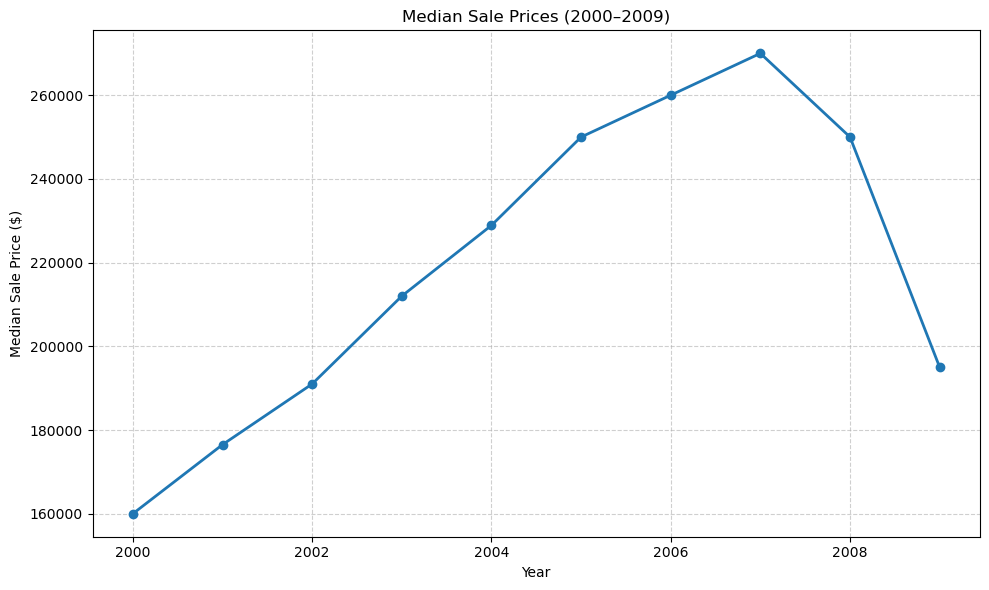

In [839]:
plt.figure(figsize=(10, 6))
plt.plot(median_prices['year'], median_prices['sale_price'], marker='o', linewidth=2)
plt.title("Median Sale Prices (2000–2009)")
plt.xlabel("Year")
plt.ylabel("Median Sale Price ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

In [841]:
# 1
print(f"H0: Sales prices did not by at least 50% from 2005 to 2009.")

H0: Sales prices did not by at least 50% from 2005 to 2009.


In [843]:
# 2-3 The questions asked were not asked in the optimal logical order.
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
df['year'] = df['sale_date'].dt.year

In [845]:
df = df.dropna(subset=['year', 'sale_price'])
df = df[df['sale_price'] > 0]

In [847]:
df_period = df[(df['year'] >= 2005) & (df['year'] <= 2009)]

In [849]:
sales_2005 = df_period[df_period['year'] == 2005]['sale_price']
sales_2009 = df_period[df_period['year'] == 2009]['sale_price']

In [851]:
median_2005 = sales_2005.median()
median_2009 = sales_2009.median()

In [853]:
print(f"\n2005 median sale price: ${median_2005:,.0f}")
print(f"2009 median sale price: ${median_2009:,.0f}")


2005 median sale price: $250,000
2009 median sale price: $195,000


In [855]:
# This answers my question right here, but will proceded with full hypothesisi testing.

In [857]:
u_stat, p_value = mannwhitneyu(sales_2005, sales_2009, alternative='less')
median_ratio = median_2009 / median_2005

print("\nMann–Whitney U Test Results:")
print(f"U statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Median ratio (2009 / 2005): {median_ratio:.2f}")


Mann–Whitney U Test Results:
U statistic: 3583813998.50
P-value: 1.0000
Median ratio (2009 / 2005): 0.78


In [859]:
if median_ratio >= 1.5 and p_value < 0.05:
    print("Reject H₀: Median sale prices increased by at least 50% from 2005 to 2009.")
else:
    print("Fail to reject H₀: No  ≥50% increase in median sale prices.")

Fail to reject H₀: No  ≥50% increase in median sale prices.


In [861]:
print("Statistical test used was the Mann–Whitney U Test.")  # Mixing it up

Statistical test used was the Mann–Whitney U Test.


In [863]:
# 2-2
print("Assumptions were met.")

Assumptions were met.


In [865]:
df_0509 = df[df['year'].isin([2005, 2009])]

In [867]:
print("Independence:")
duplicates = df_0509[df_0509.duplicated(subset=['pin', 'year'], keep=False)]
print(f"Duplicate sales in same year: {len(duplicates)}")

Independence:
Duplicate sales in same year: 174016


In [869]:
# Duplicate salesd are irrelevent.

In [871]:
print("Data type:")
print(df_0509['sale_price'].describe())

Data type:
count    1.804690e+05
mean     5.069985e+05
std      4.375534e+06
min      1.000000e+00
25%      1.495000e+05
50%      2.400000e+05
75%      3.705050e+05
max      6.002650e+08
Name: sale_price, dtype: float64


In [873]:
# 2-4
print("Distribution:")

Distribution:


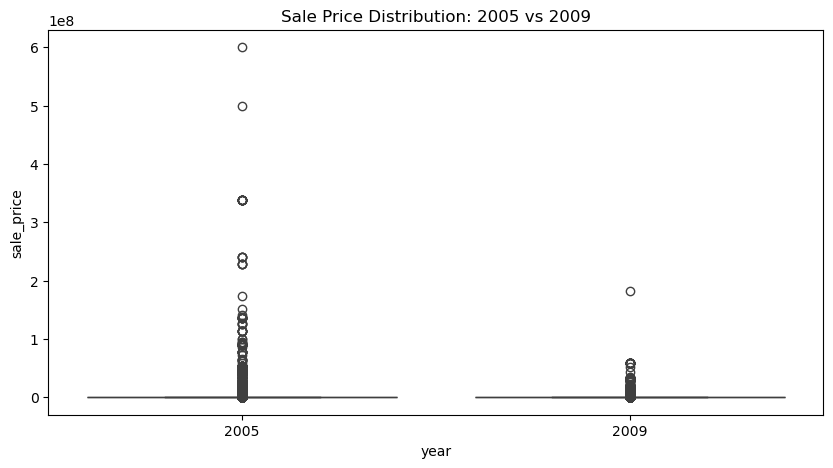

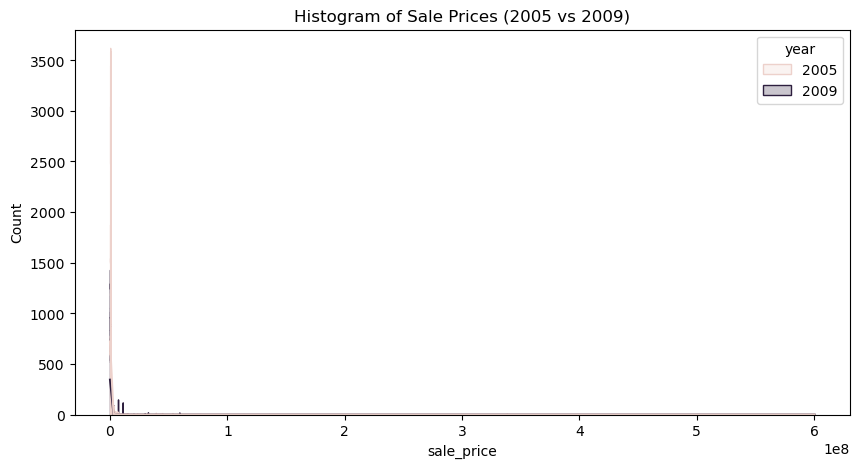

In [875]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_0509, x='year', y='sale_price')
plt.title("Sale Price Distribution: 2005 vs 2009")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df_0509, x='sale_price', hue='year', element='step', kde=True)
plt.title("Histogram of Sale Prices (2005 vs 2009)")
plt.show()

In [876]:
# 1
print(f"H0: Sales prices did not increase by at least 40% from 2000 to 2005.")

H0: Sales prices did not increase by at least 40% from 2000 to 2005.


In [877]:
# 2-3 Answered in order that makes most sense.

In [878]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
df['year'] = df['sale_date'].dt.year

In [879]:
df = df.dropna(subset=['year', 'sale_price'])
df = df[df['sale_price'] > 0]

In [880]:
df_period = df[df['year'].isin([2000, 2005])]
print("Years available in dataset:", sorted(df_period['year'].unique()))

Years available in dataset: [2000, 2005]


In [881]:
sales_2000 = df_period[df_period['year'] == 2000]['sale_price']
sales_2005 = df_period[df_period['year'] == 2005]['sale_price']

In [885]:
median_2000 = sales_2000.median()
median_2005 = sales_2005.median()

In [889]:
u_stat, p_value = mannwhitneyu(sales_2000, sales_2005, alternative='less')
median_ratio = median_2005 / median_2000

print("\nMann–Whitney U Test Results:")
print(f"U statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Median ratio (2005 / 2000): {median_ratio:.2f}")


Mann–Whitney U Test Results:
U statistic: 4938504288.50
P-value: 0.0000
Median ratio (2005 / 2000): 1.56


In [892]:
if median_ratio >= 1.4 and p_value < 0.05:
    print("Reject H₀: Median sale prices increased by at least 40% from 2000 to 2005.")
else:
    print("Fail to reject H₀: No ≥40% increase in median sale prices.")

Reject H₀: Median sale prices increased by at least 40% from 2000 to 2005.


In [894]:
# 2-2
print("Assumptions were met.")

Assumptions were met.


In [897]:
print("Independence:")
duplicates = df_0509[df_0509.duplicated(subset=['pin', 'year'], keep=False)]
print(f"Duplicate sales in same year: {len(duplicates)}")

Independence:
Duplicate sales in same year: 174016


In [899]:
print("Data type:")
print(df_0509['sale_price'].describe())

Data type:
count    1.804690e+05
mean     5.069985e+05
std      4.375534e+06
min      1.000000e+00
25%      1.495000e+05
50%      2.400000e+05
75%      3.705050e+05
max      6.002650e+08
Name: sale_price, dtype: float64


In [901]:
# 2-4
print("Distribution:")

Distribution:


In [903]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
df['year'] = df['sale_date'].dt.year
df = df.dropna(subset=['sale_price'])
df = df[df['sale_price'] > 0]

In [904]:
df_test = df[df['year'].isin([2000, 2005])]

In [907]:
print(df_test['sale_price'].describe())

count    2.439890e+05
mean     4.615087e+05
std      4.214438e+06
min      1.000000e+00
25%      1.300000e+05
50%      2.100000e+05
75%      3.360000e+05
max      6.002650e+08
Name: sale_price, dtype: float64


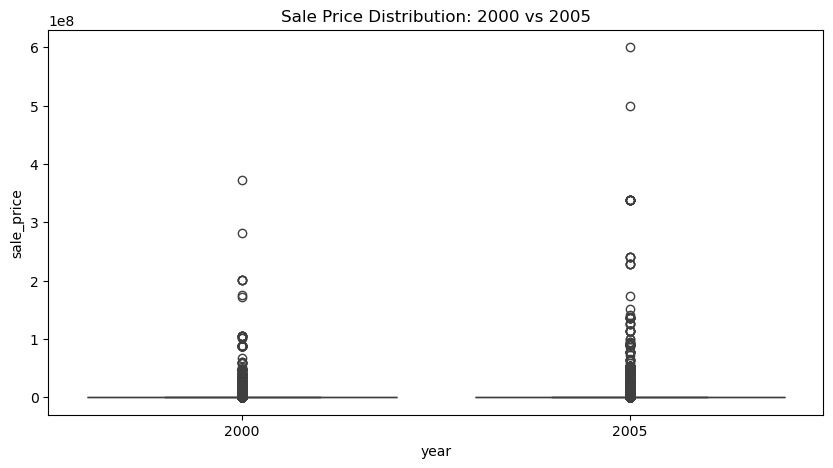

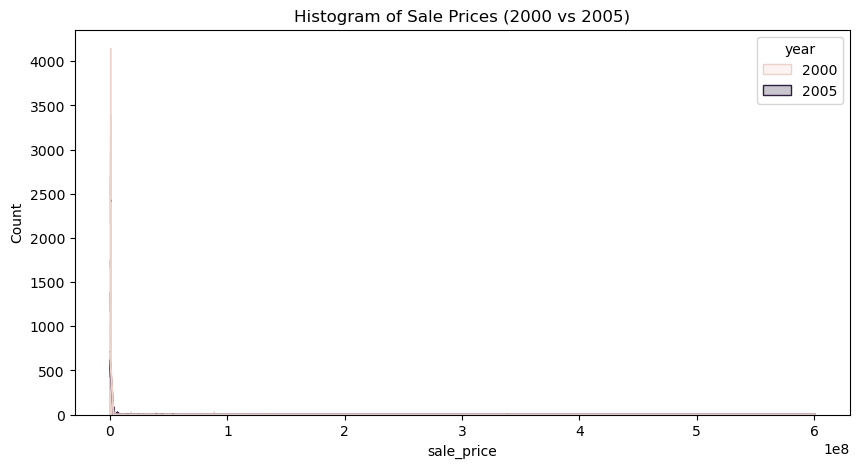

In [909]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_test, x='year', y='sale_price')
plt.title("Sale Price Distribution: 2000 vs 2005")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df_test, x='sale_price', hue='year', element='step', kde=True)
plt.title("Histogram of Sale Prices (2000 vs 2005)")
plt.show()